In [1]:
import src.Engine.schema_mapping_engine as sme

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhilashdhal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhilashdhal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhilashdhal/nltk_data...
[nltk_data]   Package punkt is

## Datasets

In [2]:
import pandas as pd
# ds = pd.read_csv('./personal_docs/schema_mapping_msk_impact_datasets/mixed_impact_subset_2022_clinical_data.tsv', sep='\t')
files = ['./personal_docs/schema_mapping_msk_impact_datasets/hnsc_tcga_gdc_clinical_data.tsv', 
         './personal_docs/schema_mapping_msk_impact_datasets/mixed_impact_subset_2022_clinical_data.tsv',
         './personal_docs/schema_mapping_msk_impact_datasets/egc_trap_ccr_msk_2023_clinical_data.tsv',
         './personal_docs/schema_mapping_msk_impact_datasets/msk_met_2021_clinical_data.tsv',
         './personal_docs/schema_mapping_msk_impact_datasets/pan_origimed_2020_clinical_data.tsv'
         ]
# Load the dataset
df = pd.read_csv('./data/cBioPortal_merging_schema.csv')
# Expand the original_field into long format
df_expanded = df['original_field'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='original_term')

# # Merge back with the curated column
# df_expanded = df_expanded.merge(df[['curated_field']], left_index=True, right_index=True)
df_expanded_merged = pd.merge(df[['curated_field']].reset_index(), df_expanded,  left_on='index', right_on='index')
df_expanded_merged['original_term'] = [x.lower() for x in df_expanded_merged['original_term']]
# Assuming df1, df2, df3, df4, df5 are your DataFrames
dataframes_ls = []
for file in files:
    ds = pd.read_csv(file, sep='\t')

    cols = [x.lower() for x in ds.columns.to_numpy()]
    terms_with_underscores = [term.replace(' ', '_') for term in cols]
    df = df_expanded_merged[df_expanded_merged['original_term'].isin(terms_with_underscores )]
    df['StudyName'] = file.split('/')[3].split('_clinical')[0]
    dataframes_ls.append(df)
    
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes_ls)

# Drop duplicate rows based on 'curated_field' and 'original_term'
unique_df = combined_df.drop_duplicates(subset=['curated_field', 'original_term'])

/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_71425/2223635940.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StudyName'] = file.split('/')[3].split('_clinical')[0]
/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_71425/2223635940.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StudyName'] = file.split('/')[3].split('_clinical')[0]
/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_71425/2223635940.py:26: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
print(unique_df.head())

## Run Schema Mapping

In [3]:
root_output = './data/schema_mapping_eval/'
for file in files:
     output_file_name = file.split('/')[3].split('_clinical')[0]
     sme_runner_bert = sme.SchemaMapEngine(
          clinical_data_path=file, 
          schema_map_path='./personal_docs/schema_map_less_nested_dict.pkl', 
          matcher_type='Bert', output_file_name=root_output + output_file_name + '_bert.json', k=5
     )

     sme_runner_lda = sme.SchemaMapEngine(
          clinical_data_path=file, 
          schema_map_path='./personal_docs/schema_map_less_nested_dict.pkl', 
          matcher_type='LDA', output_file_name=root_output + output_file_name + '_lda.json', k=5
     ) 

     sme_runner_freq = sme.SchemaMapEngine(
          clinical_data_path=file, 
          schema_map_path='./personal_docs/schema_map_less_nested_dict.pkl', 
          matcher_type=None, output_file_name=root_output + output_file_name + '_freq.json', k=5
     )
     sme_runner_bert.run_schema_mapping()
     sme_runner_lda.run_schema_mapping()
     sme_runner_freq.run_schema_mapping()
     
 

26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Initialized SchemaMap Engine module
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Running Schema Mapper
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Running Schema Mapper
26/08//2024 12:47:1724613428 AM - INFO - SchemaMapEngine: Running Schema Mapper
26/08//2024 12:47:1724613455 AM - INFO - SchemaMapEngine: Json file saved
26/08//2024 12:47:1724613455 AM - INFO - SchemaMapEngine: Json file saved
26/08//2024 12:47:1724613455 AM - INFO - SchemaM

## Evaluate accuracy

## Function for 1 dataset

In [4]:
import json

def get_results(file_path, unique_df):
    with open(file_path, 'r') as file:
        model = json.load(file)

    eval_model = {key.lower().replace(' ', '_'): value for key, value in model.items()}
    df = unique_df.copy().reset_index(drop=True)    
    # Filter DataFrame to include only rows where original_term is a key in the JSON model
    df_filtered = df[df['original_term'].isin(eval_model.keys())]

    # Map from original_term to curated_field
    original_to_curated = pd.Series(df_filtered['curated_field'].values, index=df_filtered['original_term']).to_dict()

    # Initialize the results dictionary
    results = {}

    # Evaluate each key in the model
    for key, terms in eval_model.items():
        if key in original_to_curated:
            # Check if any of the top 5 terms are in the mapped curated_field for this original_term
            match = 1 if any(term[0] in original_to_curated[key] for term in terms[:5]) else 0
            results[key] = match

    # Display the results
    for key, match in results.items():
        print(f"{key}: Match = {match}")

    # Optionally, convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(list(results.items()), columns=['Original Term', 'Match'])
    return results_df

## Function for multiple datasets

In [23]:
methods = [
     'bert', 
     #       'lda', 
           'freq'
           ]
method_acc = {}
all_results = []
for method in methods:
     accuracy = 0 
     for file in files:
          output_file_path = root_output + file.split('/')[3].split('_clinical')[0] + '_' + method + '.json'
          results_df = get_results(output_file_path, unique_df)
          accuracy += results_df[results_df['Match'] == 1].shape[0]/results_df.shape[0]
          all_results.append(results_df)
     method_acc[method] = [accuracy/5]


cancer_type: Match = 1
cancer_type_detailed: Match = 1
primary_diagnosis: Match = 1
prior_treatment: Match = 0
race_category: Match = 1
sample_type: Match = 0
sex: Match = 1
cancer_type: Match = 1
cancer_type_detailed: Match = 1
crdb_prior_rx: Match = 0
crdb_treatment_end_days: Match = 0
race_category: Match = 0
sample_type: Match = 0
sex: Match = 1
cancer_type: Match = 1
cancer_type_detailed: Match = 1
age_at_death: Match = 0
age_at_sequencing: Match = 1
cancer_type: Match = 1
cancer_type_detailed: Match = 1
race_category: Match = 1
sample_type: Match = 0
sex: Match = 1
subtype: Match = 0
subtype_abbreviation: Match = 0
cancer_type: Match = 1
cancer_type_detailed: Match = 1
sample_type: Match = 0
sex: Match = 1
specimen_type: Match = 0
treatment: Match = 0
cancer_type: Match = 1
cancer_type_detailed: Match = 1
primary_diagnosis: Match = 0
prior_treatment: Match = 0
race_category: Match = 1
sample_type: Match = 1
sex: Match = 1
cancer_type: Match = 1
cancer_type_detailed: Match = 1
crd

In [27]:
acc_df = pd.DataFrame.from_dict(method_acc).T.reset_index()

In [29]:
acc_df.columns = ['model', 'accuracy']

In [16]:
unique_df.iloc[:, 1:].reset_index()

,index,curated_field,original_term,StudyName
0,43,ancestry,race_category,hnsc_tcga_gdc
1,124,cancer_type,cancer_type,hnsc_tcga_gdc
2,129,cancer_type,primary_diagnosis,hnsc_tcga_gdc
3,136,cancer_type_detailed,cancer_type_detailed,hnsc_tcga_gdc
4,168,specimen_type,sample_type,hnsc_tcga_gdc
5,181,pop_ancestry,race_category,hnsc_tcga_gdc
6,182,sex,sex,hnsc_tcga_gdc
7,232,treatment_name,prior_treatment,hnsc_tcga_gdc
8,482,treatment_type,prior_treatment,hnsc_tcga_gdc
9,681,treatment_dose,prior_treatment,hnsc_tcga_gdc


In [18]:
import seaborn as sns

(0.0, 1.0)

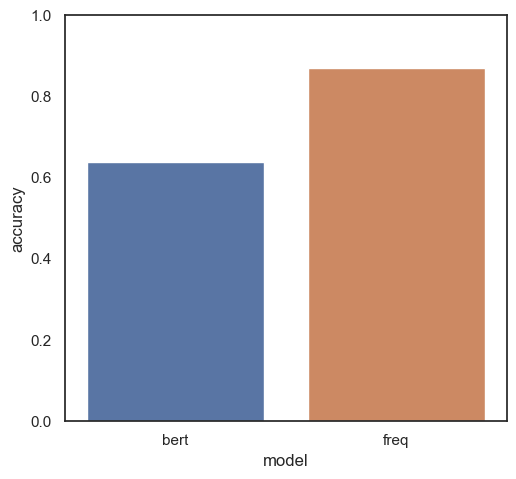

In [35]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(5.7,5.27)})
sns.set_style("white")
ax = sns.barplot(data=acc_df, x='model', y='accuracy')
ax.set_ylim(0, 1)